Today's story is about metabolic syndrome. Metabolic syndrome is a complex medical condition characterized by a cluster of interrelated risk factors that significantly elevate the chances of developing heart disease, stroke, and type 2 diabetes. These risk factors include abdominal obesity, high blood pressure, elevated blood sugar levels, high triglycerides, and low levels of "good" HDL cholesterol. This syndrome often results from a combination of genetic predisposition and unhealthy lifestyle choices, such as poor dietary habits and sedentary behavior. Managing metabolic syndrome typically involves lifestyle changes, including a balanced diet, regular physical activity, and weight control, along with potential medication as needed. By addressing these factors, individuals can reduce their risk of life-threatening cardiovascular events and the development of diabetes, ultimately improving their overall health and well-being. Now we will apply machine learning techniques in order to extract useful info about it and see how we can predict if someone suffers from this illness.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Metabolic Syndrome.csv')
print(df.head())
print(df.isnull().sum())
print(df.columns)
print(df.shape)
print(df.info)

    seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    Male   Single  8200.0  White       81.0  23.3            0   
1  62164   44  Female  Married  4500.0  White       80.1  23.2            0   
2  62169   21    Male   Single   800.0  Asian       69.6  20.1            0   
3  62172   43  Female   Single  2000.0  Black      120.4  33.3            0   
4  62177   51    Male  Married     NaN  Asian       81.1  20.1            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0     3.88       4.9            92   41             84                  0  
1     8.55       4.5            82   28             56                  0  
2     5.07       5.4           107   43             78                  0  
3     5.22       5.0           104   73            141                  0  
4     8.13       5.0            95   43            126                  0  
seqn                   0
Age                    0
Sex                

At this stage, we see that the columns named BMI, Marital, Income and WaistCirc do have some null values. For the latter three I will replace them with the mediam value of them and for marital I will create a mapping which is going to assing a random value from the value counts of this columns

In [ ]:
print(df['Marital'].value_counts())

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64


In [ ]:
import pandas as pd
import random
# List of marital statuses
marital_statuses = ['Married', 'Single', 'Divorced', 'Widowed', 'Separated']

# Function to fill null values with a random marital status
def fill_null_marital(row):
    if pd.isnull(row['Marital']):
        return random.choice(marital_statuses)
    else:
        return row['Marital']

# Apply the function to the 'marital' column
df['Marital'] = df.apply(fill_null_marital, axis=1)

# Display the updated DataFrame
print(df)


       seqn  Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
0     62161   22    Male   Single  8200.0        White       81.0  23.3   
1     62164   44  Female  Married  4500.0        White       80.1  23.2   
2     62169   21    Male   Single   800.0        Asian       69.6  20.1   
3     62172   43  Female   Single  2000.0        Black      120.4  33.3   
4     62177   51    Male  Married     NaN        Asian       81.1  20.1   
...     ...  ...     ...      ...     ...          ...        ...   ...   
2396  71901   48  Female  Married  1000.0        Other        NaN  59.7   
2397  71904   30  Female   Single  2000.0        Asian        NaN  18.0   
2398  71909   28    Male   Single   800.0  MexAmerican      100.8  29.4   
2399  71911   27    Male  Married  8200.0  MexAmerican      106.6  31.3   
2400  71915   60    Male   Single  6200.0        White      106.6  27.5   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0               0     3.8

In [ ]:
print(df['Marital'].value_counts())

Married      1237
Single        540
Divorced      281
Widowed       208
Separated     135
Name: Marital, dtype: int64


In [ ]:
# Calculate the median of the 'numeric_column'
median_value_1 = df['BMI'].median()
median_value_2 = df['Income'].median()
median_value_3 = df['WaistCirc'].median()
# Replace null values with the median
df['BMI'].fillna(median_value_1, inplace=True)
df['Income'].fillna(median_value_2, inplace=True)
df['WaistCirc'].fillna(median_value_3, inplace=True)
print(df.isnull().sum())

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64


We don't really care about the sequential number so we are going to drop it!


In [ ]:
df = df.drop('seqn', axis=1)

We can now remap the marital status to integers in order to work with it better as long as with the sex and race columns.

In [ ]:
print(df['Race'].value_counts())
marital_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Widowed': 3,
    'Separated': 4
}
race_mapping = {
    'White' : 0,
    'Black' : 1,
    'Asian' : 2,
    'Hispanic' : 3,
    'MexAmerican' : 4,
    'Other' : 5
}
sex_mapping = {
    'Male' : 0,
    'Female' : 1
}

# Map the "marital" column to integers
df['Marital'] = df['Marital'].map(marital_mapping)
df['Race'] = df['Race'].map(race_mapping)
df['Sex'] = df['Sex'].map(sex_mapping)

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64


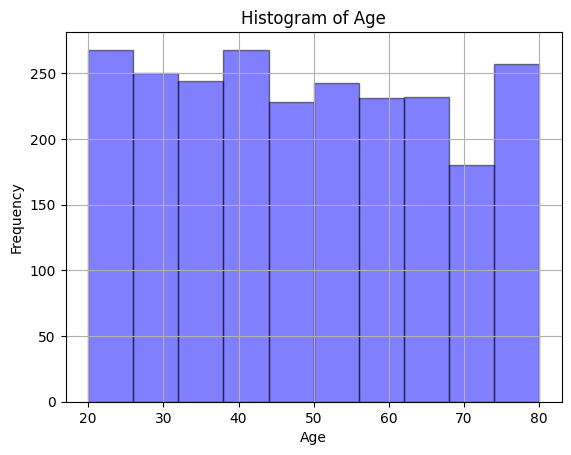

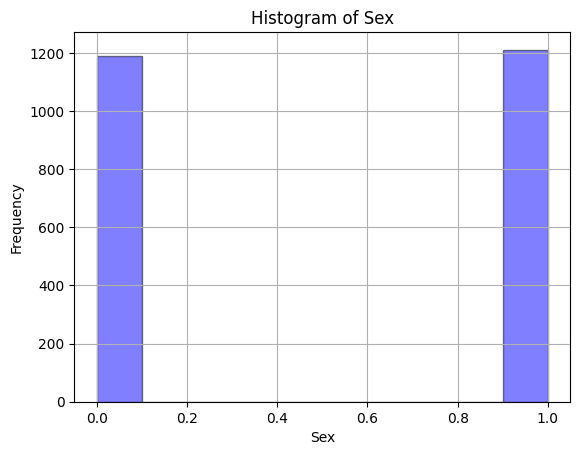

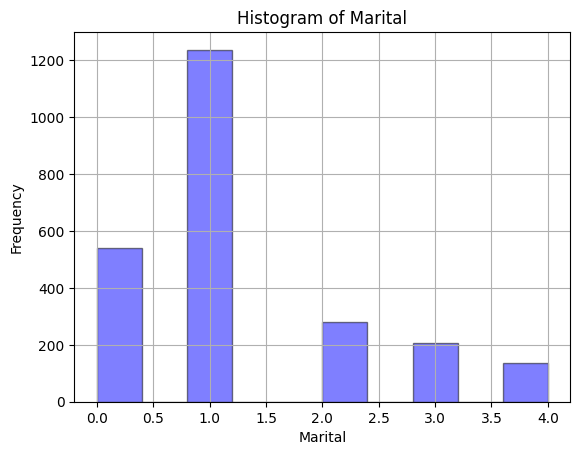

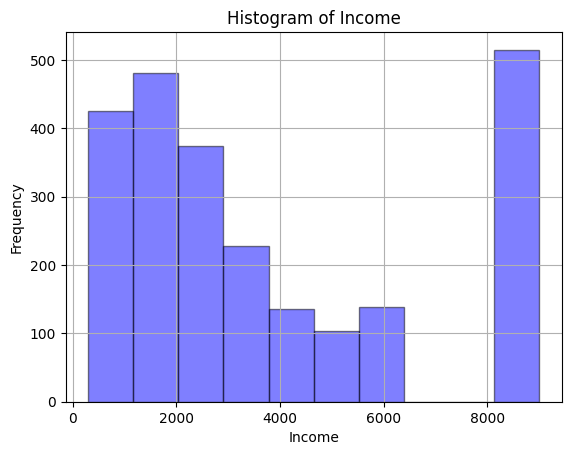

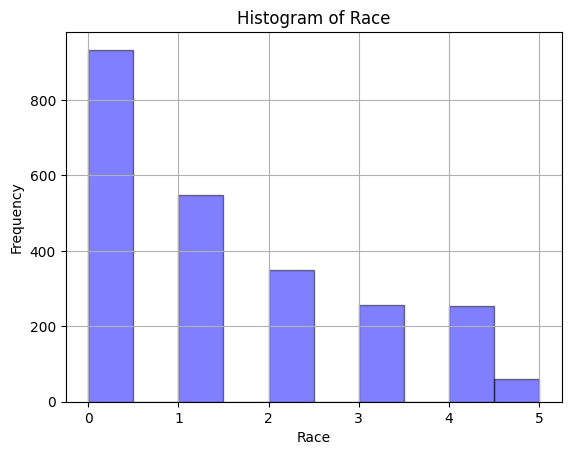

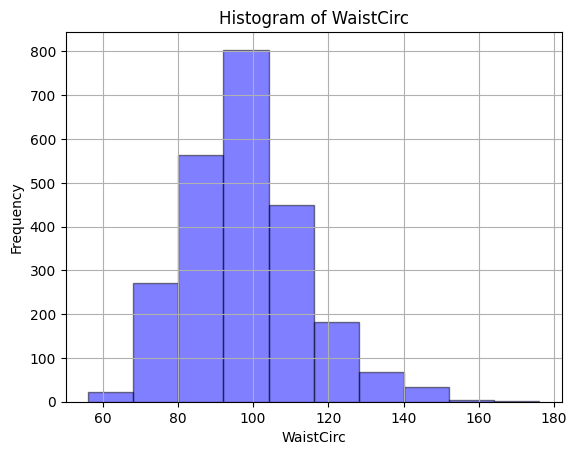

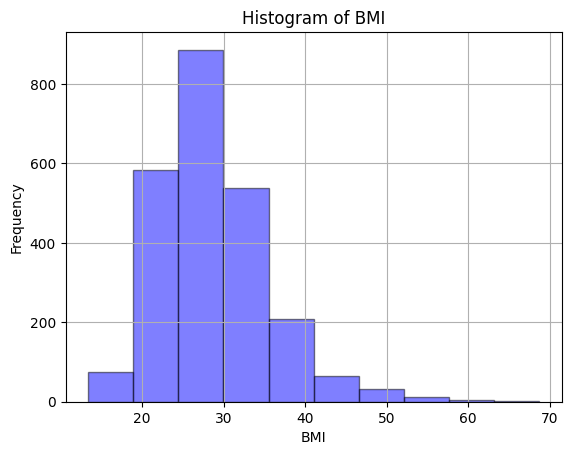

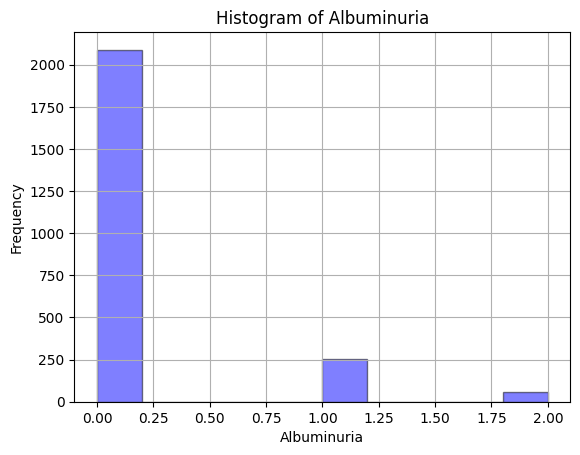

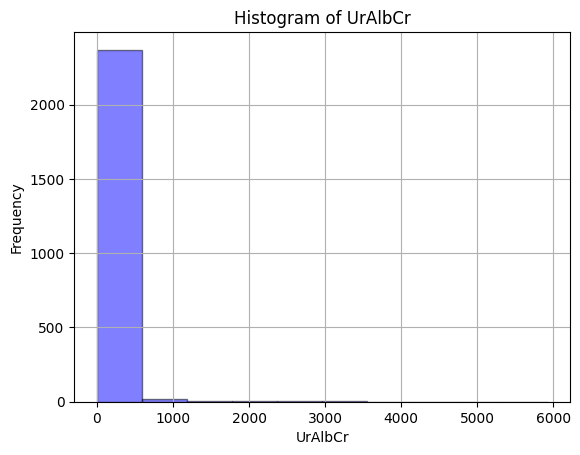

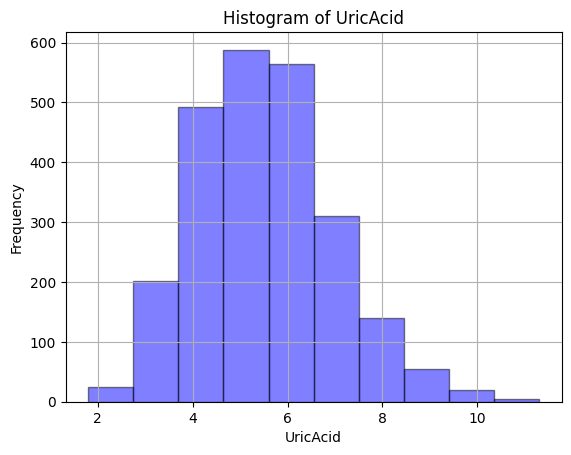

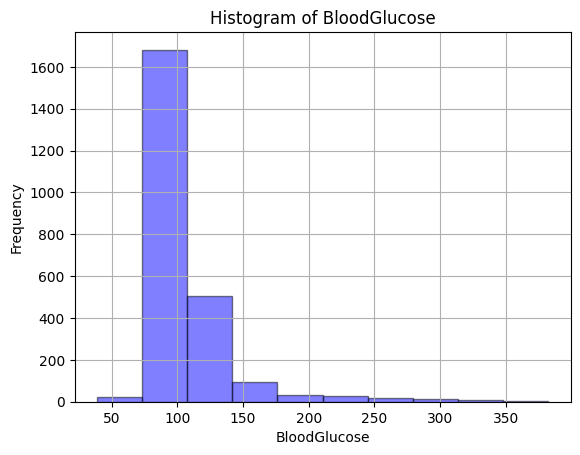

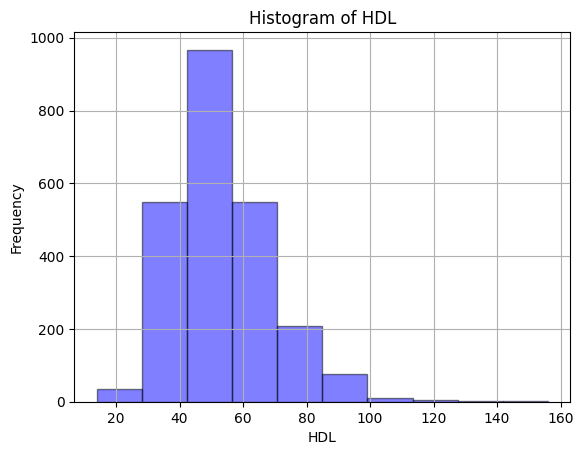

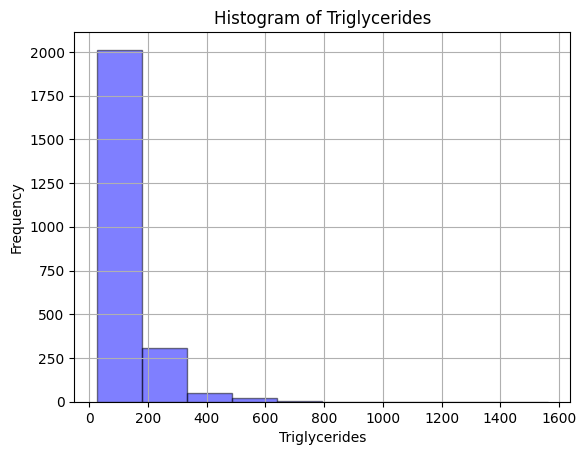

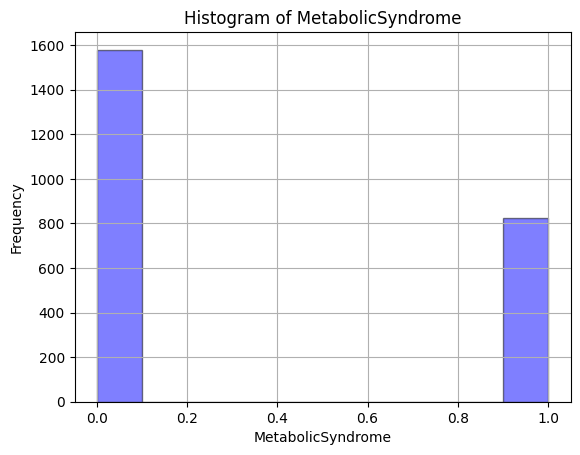

In [ ]:
import matplotlib.pyplot as plt
# Create histograms for each column
for column in df.columns:
    plt.figure()  # Create a new figure for each column
    plt.hist(df[column], bins=10, alpha=0.5, color='b', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.show()  # Display all the histograms

In [ ]:
print(df.isnull().sum())

Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64


The most common ages are 20 30 40 and 70. We have slightly more women than men and the most usual values for the uricAcid and bloodglucose are 6 and 80.

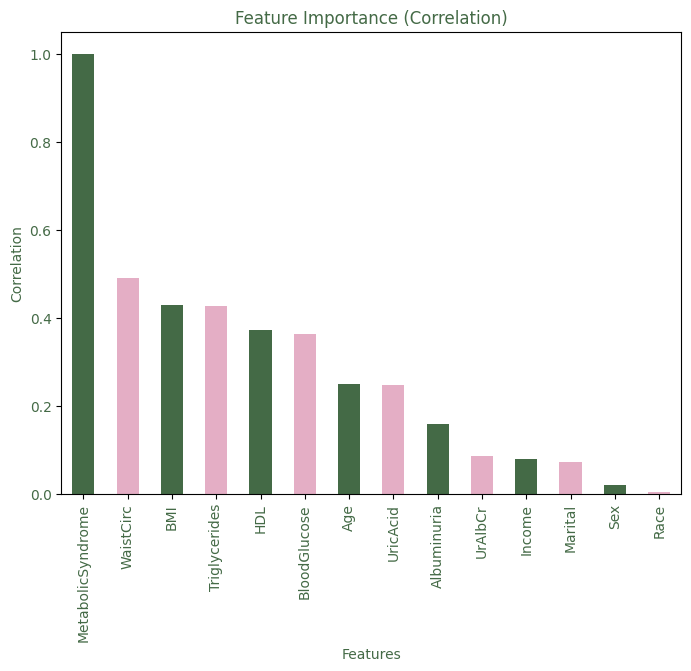

In [ ]:
def feature_correlation(df):
    correlation = df.corr()['MetabolicSyndrome'].abs()
    correlation_sorted = correlation.sort_values(ascending=False)

    plt.figure(figsize=(8, 6))

    bar_colors = ['#446A46', '#E4AEC5']

    correlation_sorted.plot(kind='bar', color=bar_colors)
    plt.title('Feature Importance (Correlation)', color='#446A46')
    plt.xlabel('Features', color='#446A46')
    plt.ylabel('Correlation', color='#446A46')
    plt.xticks(color='#446A46')
    plt.yticks(color='#446A46')
    plt.show()
feature_correlation(df)

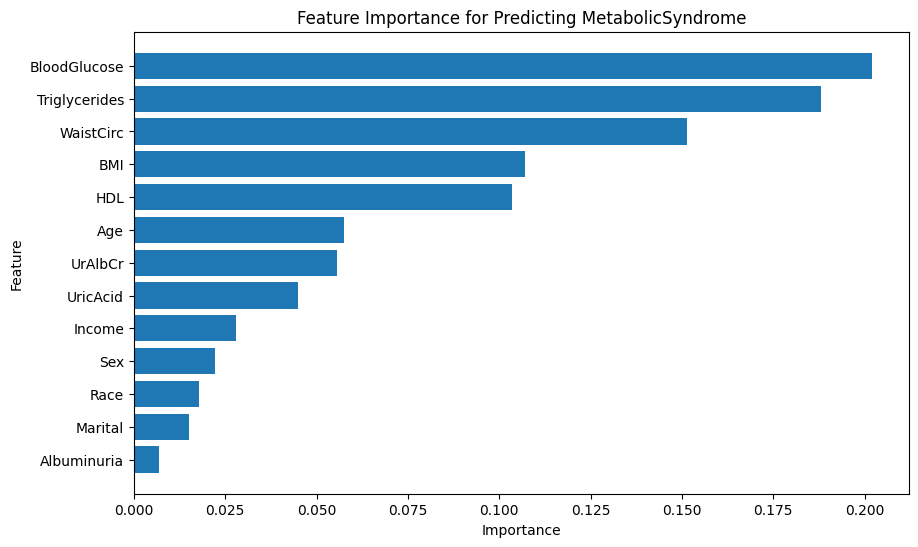

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def select_best_features(data, target_col):
    # Split the data into features (X) and the target variable (y)
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    # Create a Random Forest Classifier model
    model = RandomForestClassifier()

    # Fit the model to the data
    model.fit(X, y)

    # Get feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Sort the features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    return feature_importance_df

target_column = 'MetabolicSyndrome'
best_features = select_best_features(df, target_column)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(best_features['Feature'], best_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting MetabolicSyndrome')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Split the data into features (X) and the target variable (y)
X = df.drop('MetabolicSyndrome', axis=1)
y = df['MetabolicSyndrome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42))
]

# Iterate through the classifiers and print their accuracies
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')


Random Forest Accuracy: 0.87
Gradient Boosting Accuracy: 0.88
Logistic Regression Accuracy: 0.82
Naive Bayes Accuracy: 0.80
K-Nearest Neighbors Accuracy: 0.80
Decision Tree Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost Accuracy: 0.89
[LightGBM] [Info] Number of positive: 665, number of negative: 1255
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346354 -> initscore=-0.635104
[LightGBM] [Info] Start training from score -0.635104
LightGBM Accuracy: 0.88
